# Semaine 11 - Réseau de neurones de base

Cette semaine nous allons écrire un réseau de neurones de base, que nous allons entraîner afin qu'il inverse des séquences de bits. Si vous réussissez à l'implémenter, vous pourrez ensuite vous amuser à l'utiliser sur d'autres types de données

## Importations et initialisations de variables

Nous n'allons utiliser que numpy pour cet exercice

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Nous avons un réseau à deux couches (l'input ne comptant pas pour une couche). Nous allons utiliser 300 séquences de bits pour l'entraînement.

In [2]:
# Nb de neurones sur chaque couche
n_in = 10
n_hidden = 8
n_out = 10

# Nb de 'training examples'
m = 300

In [40]:
alpha = 0.5  # Learning rate
epochs = 250 # nb iterations du gradient descent

## Définition des fonctions d'activation

Nous utiliserons la fonction tanh pour l'activation de la "hidden layer", et la sigmoïde pour la dernière couche. Implémentez-les si elle n'existent pas déjà dans numpy. Implémentez aussi la dérivée de l'une ou l'autre d'entre elles, le cas échéant.
Attention! Les fonctions doivent pouvoir traiter des vecteurs ou des matrices en effectuant l'opération sur chaque élément de ces derniers.

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
# Dérivée de tanh
def tanh_prime(x):
    return 1 - np.tanh(x)**2
#    return 1 - np.power(np.tanh(x), 2)


In [7]:
# Dérivée de sigmoid
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))


## Entraînement du réseau de neurones

Nous allons écrire une fonction qui fait une activation puis une rétropropagation, puis renvoie l'erreur (loss) et le gradient (toutes ces variables qui commencent par d...). L'itération sur les 200 epochs se fera dans un deuxième temps.

In [8]:
def train(X, Y, W1, W2, b1, b2):
    loss_history = []    
    for epoch in range(epochs):
        # Forward
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        # Backward
        dZ2 = A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims = True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), tanh_prime(Z1))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims = True)
        # Parameter update (use the learning rate alpha here!)
        W1 = W1 - (alpha * dW1)
        W2 = W2 - (alpha * dW2)
        b1 = b1 - (alpha * db1)
        b2 = b2 - (alpha * db2)
        # Compute loss
        L = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
        loss = - np.sum(L) / m
        #loss = - (np.dot(Y, np.log(A2)) + np.dot((1 - Y), np.log(1 - A2))) / m
        loss_history.append(loss)
        print("Epoch %d, Loss: %.8f" % (epoch, loss))
    return loss_history, W1, W2, b1, b2

### Initialisation des paramètres du réseau

Attention, certains paramètres sont initalisés à zéro, d'autres non...

In [41]:
W1 = np.random.randn(n_hidden, n_in) * 0.01
W2 = np.random.randn(n_out, n_hidden) * 0.01
b1 = np.zeros((n_hidden, 1))
b2 = np.zeros((n_out, 1))
W2.shape

(10, 8)

## Génération des données d'entraînement

Ici il s'agit créer 300 séries de 10 chiffres binaires (1 et 0) pour les X.
Les Y seront ces mêmes séries, inversées.

In [12]:
# Data generation
X = np.random.binomial(1, 0.5, (n_in, m))
Y = X ^ 1
print(X)
print(Y)

[[0 1 0 ..., 1 0 1]
 [1 0 0 ..., 0 0 1]
 [1 0 1 ..., 1 1 0]
 ..., 
 [1 0 0 ..., 0 1 0]
 [1 0 1 ..., 1 0 0]
 [1 0 1 ..., 0 0 1]]
[[1 0 1 ..., 0 1 0]
 [0 1 1 ..., 1 1 0]
 [0 1 0 ..., 0 0 1]
 ..., 
 [0 1 1 ..., 1 0 1]
 [0 1 0 ..., 0 1 1]
 [0 1 0 ..., 1 1 0]]


## Lancer l'entraînement du réseau

In [42]:
loss_history, W1, W2, b1, b2 = train(X, Y, W1, W2, b1, b2)

Epoch 0, Loss: 6.93120632
Epoch 1, Loss: 6.92791003
Epoch 2, Loss: 6.92522168
Epoch 3, Loss: 6.92294821
Epoch 4, Loss: 6.92092786
Epoch 5, Loss: 6.91901803
Epoch 6, Loss: 6.91708471
Epoch 7, Loss: 6.91499264
Epoch 8, Loss: 6.91259556
Epoch 9, Loss: 6.90972583
Epoch 10, Loss: 6.90618279
Epoch 11, Loss: 6.90171940
Epoch 12, Loss: 6.89602651
Epoch 13, Loss: 6.88871466
Epoch 14, Loss: 6.87929338
Epoch 15, Loss: 6.86714888
Epoch 16, Loss: 6.85152223
Epoch 17, Loss: 6.83149174
Epoch 18, Loss: 6.80596588
Epoch 19, Loss: 6.77369580
Epoch 20, Loss: 6.73331892
Epoch 21, Loss: 6.68344554
Epoch 22, Loss: 6.62279635
Epoch 23, Loss: 6.55038739
Epoch 24, Loss: 6.46573939
Epoch 25, Loss: 6.36906308
Epoch 26, Loss: 6.26135559
Epoch 27, Loss: 6.14435109
Epoch 28, Loss: 6.02031304
Epoch 29, Loss: 5.89171769
Epoch 30, Loss: 5.76092239
Epoch 31, Loss: 5.62991051
Epoch 32, Loss: 5.50016191
Epoch 33, Loss: 5.37264467
Epoch 34, Loss: 5.24788966
Epoch 35, Loss: 5.12610216
Epoch 36, Loss: 5.00727564
Epoch 37, L

### Visualiser la décroissance de l'erreur sur un graphe (optionnel)

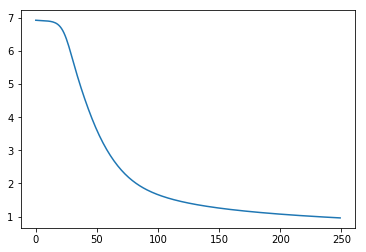

In [43]:
%matplotlib inline
fit = plt.figure()
ax = plt.axes()
ax.plot(loss_history)

## Évaluation du réseau de neurones

Écrivez une petite fonction qui, à partir des activation de la dernière couche du réseau, produit un vecteur de 1 et de 0. Normalement il suffit de copier-coller quelque lignes de code et d'ajouter quelque chose à la fin. Attention, ici, contrairement à ce qu'on avait dans le MOOC, la dernière couche a 10 valeurs de sortie, et non pas une seule.

In [ ]:
def predict(X, W1, W2, b1, b2):
   


### Tester la performance sur un seul exemple
Ici on génère un seul exemple (une série de 10 chiffres binaires), puis on fait prédire son inversion.

In [ ]:
X = np.random.binomial(1, 0.5, (n_in,1))
print(X.T)
print(predict(X, W1, W2, b1, b2).T)

### Tester la performance sur une série d'exemples